## Building the Auto-Encoder

In [ ]:
pip install tensorflow

In [2]:
## Importing libraries
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
## Building the image data set
data = tf.keras.utils.image_dataset_from_directory('Image_Data', labels = None, color_mode = 'grayscale', 
                                                   batch_size = 32, image_size = (200, 200), shuffle = True)

## Scaling the data to be between 0 and 1
data = data.map(lambda x: (x / 255))

Found 4050 files belonging to 1 classes.


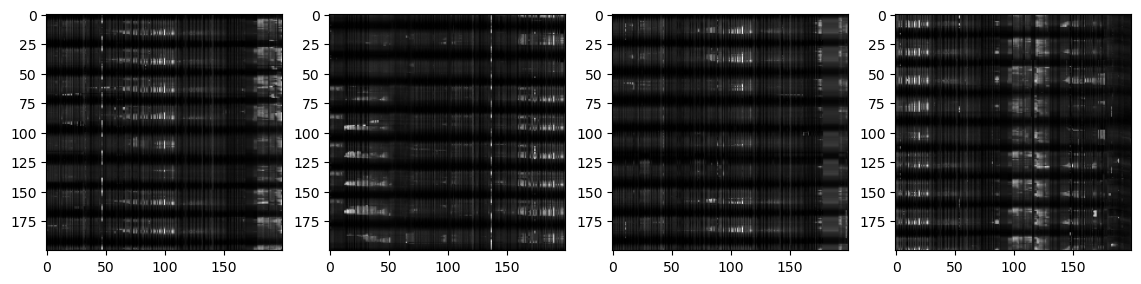

In [7]:
## Defining a numpy iterator to look through data batches
data_interator = data.as_numpy_iterator()

## Grabbing the first batch from the data set
batch = data_interator.next()

## Visualizing some images from the first batch
fig, axs = plt.subplots(ncols = 4, figsize = (14, 14))
for i, img in enumerate(batch[:4]):
    axs[i].imshow(img, cmap = 'gray')

In [64]:
## Building the auto-encoder architecture
model = Sequential()

model.add(Conv2D(20, (9,9), 1, activation = 'relu', input_shape = (1, 200, 200), name = 'Conv1'))
model.add(MaxPooling2D(pool_size = (4,4), strides = None, padding = 'valid', name = 'Max1'))

model.add(Conv2D(60, (9,9), 1, activation = 'relu', name = 'Conv2'))
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', name = 'Max2'))

model.add(Conv2D(180, (9,9), 1, activation = 'relu', name = 'Conv3'))
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', name = 'Max3'))

model.add(Dense(6, activation = 'relu', name = 'Dense'))

In [65]:
model.compile(optimizer = 'adam', loss = tf.losses.MeanSquaredError())

In [66]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 20, 192, 192)      1640      
                                                                 
 Max1 (MaxPooling2D)         (None, 20, 48, 48)        0         
                                                                 
 Conv2 (Conv2D)              (None, 60, 40, 40)        97260     
                                                                 
 Max2 (MaxPooling2D)         (None, 60, 20, 20)        0         
                                                                 
 Conv3 (Conv2D)              (None, 180, 12, 12)       874980    
                                                                 
 Max3 (MaxPooling2D)         (None, 180, 6, 6)         0         
                                                                 
 Dense (Dense)               (None, 180, 6, 6)       

In [ ]:
encoder_decoder = tf.keras.Sequential([
        
        # Encoder
        tf.keras.layers.Conv2D(filters=20, kernel_size=9, strides=4, activation='relu', input_shape=(200, 200, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=4),
        tf.keras.layers.Conv2D(filters=60, kernel_size=9, strides=2, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        tf.keras.layers.Conv2D(filters=180, kernel_size=9, strides=2, activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=2),
        
        # Fully Connected Layer
        tf.keras.layers.Reshape((6*6, 180)),
        tf.keras.layers.Dense(units=6*6, activation='relu'),
        tf.keras.layers.Reshape((6, 6, 180)),
        
        # Decoder
        tf.keras.layers.Conv2DTranspose(filters=60, kernel_size=9, strides=2, activation='relu'),
        tf.keras.layers.Conv2DTranspose(filters=20, kernel_size=9, strides=2, activation='relu'),
        tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=9, strides=4, activation='sigmoid'),
    ])